In [3]:
import torch
import numpy as np
from pathlib import Path
import torchio as tio
from torchio.transforms import HistogramStandardization
import os
import nibabel as nib
import matplotlib.pyplot as plt

fp = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\sec_ordenadas\sujetos"
fp2 = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\test_mhd"
allfiles = os.listdir(fp)

lista = [os.path.join(fp,file) for file in allfiles]

# t1_landmarks_path = Path('t1_landmarks.npy')


# t1_landmarks = (
#     t1_landmarks_path
#     if t1_landmarks_path.is_file()
#     else HistogramStandardization.train(lista)
# )
# torch.save(t1_landmarks, t1_landmarks_path)



landmarks_dict = {
     't1': "t1_landmarks.npy"
}

torch.save(landmarks_dict, 'path_to_landmarks.pth')
transform = tio.HistogramStandardization('path_to_landmarks.pth')



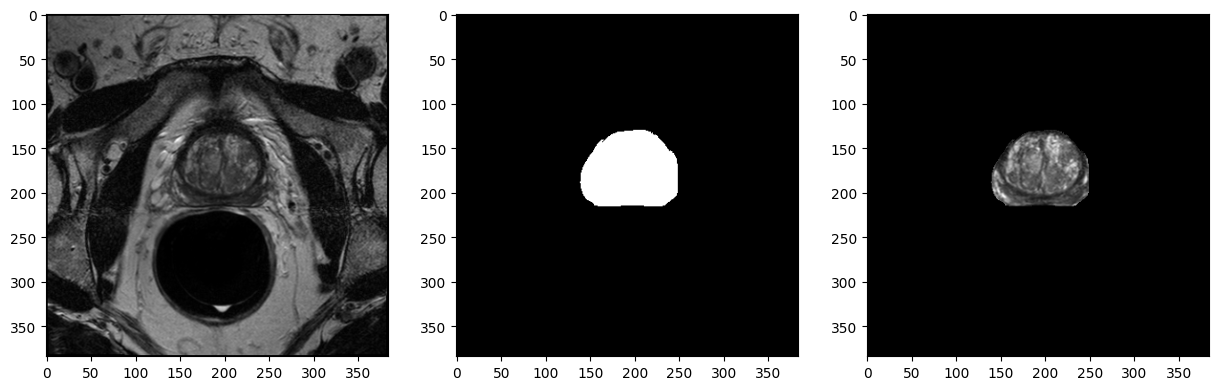

In [8]:
fp2 = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\sec_ordenadas"
allfiles = os.listdir(fp2)
num_sujeto = 15 #1-116
x = nib.load(os.path.join(fp2,"sujeto_"+str(num_sujeto).zfill(3)+".nii"))
sujeto = x.get_fdata()
y = nib.load(os.path.join(fp2,"segmentacion_"+str(num_sujeto).zfill(3)+".nii"))
seg = y.get_fdata()
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(sujeto[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
ax[1].imshow(seg[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
ax[2].imshow(sujeto[:,:,int(np.size(sujeto,2)/2)]*seg[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
plt.show()

In [35]:
import os
import nibabel as nib
import numpy as np
import cv2
import torchio as tio
from torchio.transforms import HistogramStandardization

fp = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\bias_corrected_sec"
fp2 = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\separadas"
allfiles = os.listdir(fp)
mri_max = 0
mri_min = 0
means = []
variances = []
for file in allfiles:
    if "sujeto" in file:
        x = nib.load(os.path.join(fp,file))
        x = x.get_fdata()
        for slice in range(np.size(x,2)):
            means.append(np.mean(x[63:319,63:319,slice], axis=0))

media = np.mean(means)
print(media)

348.90473521669895


In [36]:
fp = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\bias_corrected_sec"
fp2 = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\separadas"
allfiles = os.listdir(fp)
mri_max = 0
mri_min = 0
means = []
variances = []
for file in allfiles:
    if "sujeto" in file:
        x = nib.load(os.path.join(fp,file))
        x = x.get_fdata()
        for slice in range(np.size(x,2)):
            var = np.mean((x[63:319,63:319,slice] - media) ** 2, axis=0)
            variances.append(var)

desviacion = np.sqrt(np.mean(variances))
print(desviacion)

346.8633881202607


In [37]:
fp = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\bias_corrected_sec"
fp2 = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\test_mhd"
allfiles = os.listdir(fp)
allfilesfinales = os.listdir(fp2)
cont = 0
cont2 = 0

for file in sorted(allfiles):
    x = nib.load(os.path.join(fp,file))
    if "sujeto" in file:
        normalized = x.get_fdata()
        for slices in range(np.size(normalized,2)):
            cont+=1
            img = (normalized[63:319,63:319,slices]-media)/desviacion
            cv2.imwrite(fp2+"\sujetos\img_sujeto_"+str(cont).zfill(4)+".png", img)
    else:
        seg = x.get_fdata()
        for slices in range(np.size(seg,2)):
            cont2+=1
            img = seg[63:319,63:319,slices]
            cv2.imwrite(fp2+"\mascaras\img_segmentacion_"+str(cont2).zfill(4)+".png", img)